C:\Users\child\AppData\Local\Temp\ipykernel_26212\3824470089.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CLOSE'].replace(0, np.nan, inplace=True)
C:\Users\child\anaconda3\envs\test0301\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\child\anaconda3\envs\test0301\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWar

                               SARIMAX Results                                
Dep. Variable:                  CLOSE   No. Observations:                 6916
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5626.891
Date:                Tue, 09 Jul 2024   AIC                          11271.781
Time:                        19:44:19   BIC                          11333.354
Sample:                             0   HQIC                         11293.011
                               - 6916                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
OPEN          -0.4768      0.003   -177.147      0.000      -0.482      -0.471
HIGH           0.6866      0.002    337.663      0.000       0.683       0.691
LOW            0.7889      0.003    312.160      0.0

C:\Users\child\anaconda3\envs\test0301\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\child\anaconda3\envs\test0301\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\child\anaconda3\envs\test0301\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


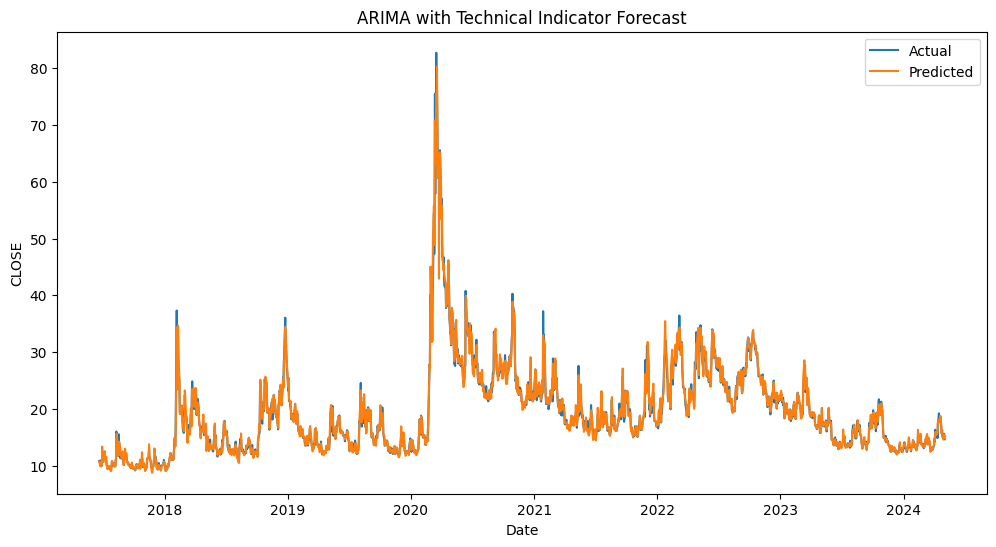

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

# 讀取數據
data = pd.read_csv('VIX0705.csv')

# 日期格式轉換
data['DATE'] = pd.to_datetime(data['DATE'])

# 將數據設置為時間序列格式
data.set_index('DATE', inplace=True)

# 檢查並處理 CLOSE 列中的零值或空值
data['CLOSE'].replace(0, np.nan, inplace=True)
data.dropna(subset=['CLOSE'], inplace=True)

# 拆分訓練集和測試集（80%訓練，20%測試）
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# 訓練ARIMA模型，這裡使用(p=1, d=1, q=1)作為示例
model_arima = ARIMA(train['CLOSE'], exog=train[['OPEN', 'HIGH', 'LOW','KD', 'RSI', 'MACD']], order=(1, 1, 1))
model_arima_fit = model_arima.fit()

# 模型診斷
print(model_arima_fit.summary())

# AIC和BIC值
aic_value = model_arima_fit.aic
bic_value = model_arima_fit.bic

print(f'ARIMA AIC: {aic_value:.4f}')
print(f'ARIMA BIC: {bic_value:.4f}')

# 進行預測
start = len(train)
end = len(train) + len(test) - 1
predictions_arima = model_arima_fit.predict(start=start, end=end, typ='levels', exog=test[['OPEN', 'HIGH', 'LOW','KD', 'RSI', 'MACD']])

# 確保 predictions 和 test['CLOSE'] 長度一致
predictions = predictions_arima[:len(test)]
predictions.index = test.index  # 確保索引一致

# 確認長度一致
print(f"Length of predictions: {len(predictions)}")
print(f"Length of test: {len(test)}")

# 評估模型
mse_arima = mean_squared_error(test['CLOSE'], predictions)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(test['CLOSE'], predictions)

# 計算MAPE時去除0值和NaN值
test_filtered = test['CLOSE'].replace(0, np.nan).dropna()
predictions_filtered = predictions.loc[test_filtered.index]

mape_arima = np.mean(np.abs((test_filtered - predictions_filtered) / test_filtered)) * 100

print(f'ARIMA MSE: {mse_arima:.4f}')
print(f'ARIMA RMSE: {rmse_arima:.4f}')
print(f'ARIMA MAE: {mae_arima:.4f}')
print(f'ARIMA MAPE: {mape_arima:.2f}')

# 繪製預測值和實際值的圖
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['CLOSE'], label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.title('ARIMA with Technical Indicator Forecast')
plt.xlabel('Date')
plt.ylabel('CLOSE')
plt.legend()
plt.show()


In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# 讀取數據
data = pd.read_csv('VIX0705.csv')
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)
data['CLOSE'].replace(0, np.nan, inplace=True)
data.dropna(subset=['CLOSE'], inplace=True)

# 使用全部數據訓練 ARIMA 模型
model_arima = ARIMA(data['CLOSE'], exog=data[['OPEN', 'HIGH', 'LOW', 'KD', 'RSI', 'MACD']], order=(1, 1, 1))
model_arima_fit = model_arima.fit()

# 預測整個數據集
predictions_full = model_arima_fit.predict(start=data.index[0], end=data.index[-1], typ='levels', exog=data[['OPEN', 'HIGH', 'LOW', 'KD', 'RSI', 'MACD']])

# 創建 DataFrame 儲存預測結果，包含時間和預測值
predictions_df = pd.DataFrame({
    'DATE': predictions_full.index,
    'PREDICTED_CLOSE': predictions_full.values
})

# 將 DataFrame 保存為 CSV 文件，包括日期和預測值
predictions_df.to_csv('Predictions_0709_arima_macd.csv', index=False)

C:\Users\child\AppData\Local\Temp\ipykernel_26212\673930371.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CLOSE'].replace(0, np.nan, inplace=True)
C:\Users\child\anaconda3\envs\test0301\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\child\anaconda3\envs\test0301\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarni